# Upgrad Uber case study

Objective:-  here we have provided a "Uber data set". in which we have to identify the root cause of the problem (i.e. cancellation and non-availability of cars) and recommend ways to improve the situation. As a result of your analysis, you should be able to present to the client the root cause(s) and possible hypotheses of the problem(s) and recommend ways to improve them.

In [2]:
## importing the required libraries.

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [3]:
## reading the csv file and printing data frame.

df = pd.read_csv("C:\\Users\\sunil\\Downloads\\Uber Request Data.csv")
df

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47
...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,15-07-2016 23:49:03,NaN
6741,6752,Airport,NaN,No Cars Available,15-07-2016 23:50:05,NaN
6742,6751,City,NaN,No Cars Available,15-07-2016 23:52:06,NaN
6743,6754,City,NaN,No Cars Available,15-07-2016 23:54:39,NaN




to refine the data in terms of date and time, we'll use 'datetime' function.

In [4]:
## renaming the columns for convient analysis

df = df.rename(columns = {'Pickup point':'pickup_point','Status':'status','Request timestamp':'request_timestamp','Drop timestamp':'drop_timestamp'})
df

,Request id,pickup_point,Driver id,status,request_timestamp,drop_timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47
...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,15-07-2016 23:49:03,NaN
6741,6752,Airport,NaN,No Cars Available,15-07-2016 23:50:05,NaN
6742,6751,City,NaN,No Cars Available,15-07-2016 23:52:06,NaN
6743,6754,City,NaN,No Cars Available,15-07-2016 23:54:39,NaN


In [5]:
import datetime
df['request_timestamp']=pd.to_datetime(df['request_timestamp'])
df['drop_timestamp']=pd.to_datetime(df['drop_timestamp'])
df

,Request id,pickup_point,Driver id,status,request_timestamp,drop_timestamp
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47
...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,2016-07-15 23:49:03,NaT
6741,6752,Airport,NaN,No Cars Available,2016-07-15 23:50:05,NaT
6742,6751,City,NaN,No Cars Available,2016-07-15 23:52:06,NaT
6743,6754,City,NaN,No Cars Available,2016-07-15 23:54:39,NaT




now the date and time are refined, and ready for analysis.

In [6]:
##dividing the trips into 6 sessions based on dt.hour from Request Timestamp.

session_labels=['Late Night','Early Morning','Late Morning','Afternoon','Evening','Night']
df = df.assign(session=pd.cut(df.request_timestamp.dt.hour,[-1,4,8,12,16,20,24],labels=session_labels))
df.head()

,Request id,pickup_point,Driver id,status,request_timestamp,drop_timestamp,session
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,Late Morning
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,Evening
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,Late Morning
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,Night
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,Early Morning


In [7]:
#checking unique values in status column.

df['status'].unique()

array(['Trip Completed', 'Cancelled', 'No Cars Available'], dtype=object)

Text(0, 0.5, 'Total Count of Trip Status')

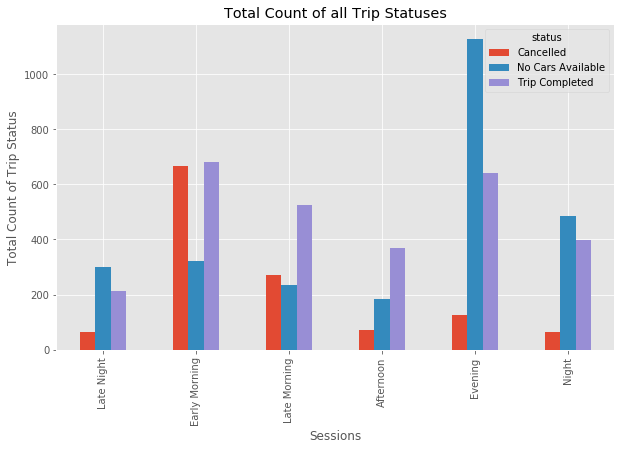

In [33]:
## plotting the frequency of data distribution.

df.groupby(['session','status']).status.count().unstack().plot.bar(legend=True, figsize=(10,6))
plt.title('Total Count of all Trip Statuses')
plt.xlabel('Sessions')
plt.ylabel('Total Count of Trip Status')

Observations:

1. as the plot shows that maximum number of "No Cars Available" status trip can be seen in evening(Time Slot: 4PM to 8PM).

2. the maximum number of "cancelled" status trip can be seen in early morning(Time Slot: 4AM to 8AM).

### now we will analyse the data by catagories.

### 1. status.

focusing over "Cancelled" status.

In [9]:
df1 = df.loc[df['status'] == 'Cancelled']
df1

,Request id,pickup_point,Driver id,status,request_timestamp,drop_timestamp,session
2831,2905,City,1.0,Cancelled,2016-07-13 06:08:41,NaT,Early Morning
2832,4805,City,1.0,Cancelled,2016-07-14 17:07:58,NaT,Evening
2833,5202,Airport,1.0,Cancelled,2016-07-14 20:51:37,NaT,Evening
2834,5927,City,1.0,Cancelled,2016-07-15 10:12:40,NaT,Late Morning
2835,2347,Airport,2.0,Cancelled,2016-12-07 19:14:00,NaT,Evening
...,...,...,...,...,...,...,...
4090,1641,City,299.0,Cancelled,2016-12-07 07:20:00,NaT,Early Morning
4091,4158,City,299.0,Cancelled,2016-07-14 05:03:10,NaT,Early Morning
4092,4164,City,299.0,Cancelled,2016-07-14 05:06:40,NaT,Early Morning
4093,4448,City,299.0,Cancelled,2016-07-14 08:30:59,NaT,Early Morning


Text(0, 0.5, 'Total Count of "Cancelled" Trips')

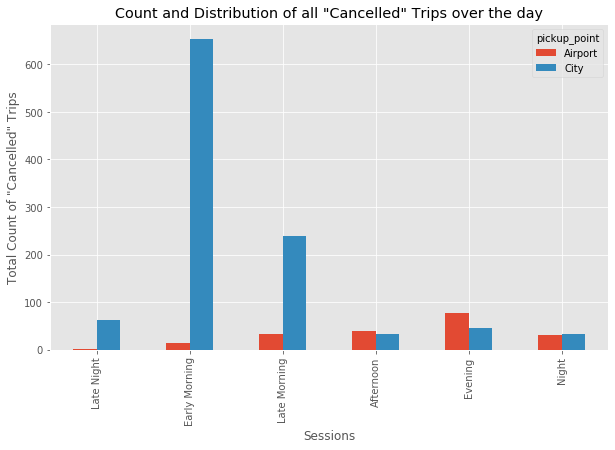

In [34]:
df1.groupby(['session','pickup_point']).pickup_point.count().unstack().plot.bar(legend=True, figsize=(10,6))
plt.title('Count and Distribution of all "Cancelled" Trips over the day')
plt.xlabel('Sessions')
plt.ylabel('Total Count of "Cancelled" Trips')

Observation:

1. maximum number of "Cancelled" status trip can be seen when the trip route is city to airport in evening
2. most of the trips are Cancelled in the "Early mornings" and "Late evening".


focusing over "No Cars Available" status.

In [11]:
df2 = df.loc[df['status'] == 'No Cars Available']
df2

,Request id,pickup_point,Driver id,status,request_timestamp,drop_timestamp,session
4095,1362,City,NaN,No Cars Available,2016-11-07 00:02:00,NaT,Late Night
4096,1364,City,NaN,No Cars Available,2016-11-07 00:06:00,NaT,Late Night
4097,1366,City,NaN,No Cars Available,2016-11-07 00:09:00,NaT,Late Night
4098,2,Airport,NaN,No Cars Available,2016-11-07 00:23:00,NaT,Late Night
4099,7,Airport,NaN,No Cars Available,2016-11-07 00:30:00,NaT,Late Night
...,...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,2016-07-15 23:49:03,NaT,Night
6741,6752,Airport,NaN,No Cars Available,2016-07-15 23:50:05,NaT,Night
6742,6751,City,NaN,No Cars Available,2016-07-15 23:52:06,NaT,Night
6743,6754,City,NaN,No Cars Available,2016-07-15 23:54:39,NaT,Night


Text(0, 0.5, 'Total Count of "No Car Availble" Trips')

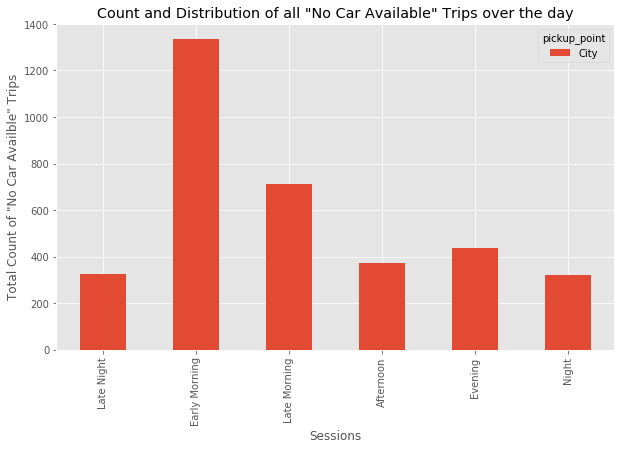

In [35]:
df2.groupby(['session','pickup_point']).pickup_point.count().unstack().plot.bar(legend=True, figsize=(10,6))
plt.title('Count and Distribution of all "No Car Available" Trips over the day')
plt.xlabel('Sessions')
plt.ylabel('Total Count of "No Car Availble" Trips')

Observation:

1. from the above plot we can say that, maximum number of "No Cars Available" status trip can be seen when the trip route is airport to city in evening.
2. most of the time chances of getting a cab from airport in "Evening" and "Night" is lesser compered to others.

Inference:
Most number of No Cars Available happen in the Evening Hours (4PM-8PM) in the Airport to City route


### 2. Pickup point.

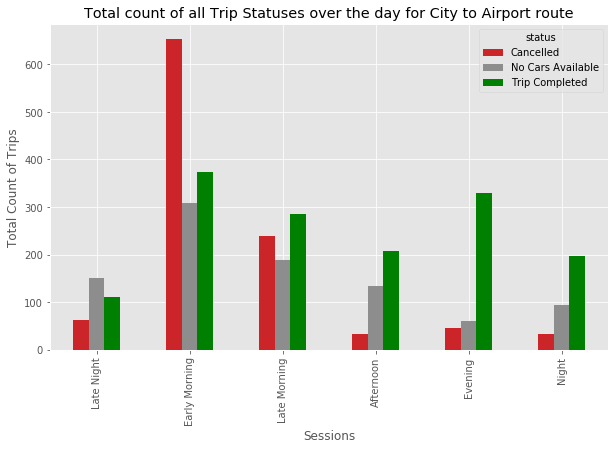

In [36]:
# Filtering out trips in the City to Airport route. Pick-up Point - City

df2=df[df["pickup_point"].str.contains('City')==True]
df2.groupby(['session','status']).status.count().unstack().plot.bar(legend=True, figsize=(10,6), color=colors)
plt.title('Total count of all Trip Statuses over the day for City to Airport route')
plt.xlabel('Sessions')
plt.ylabel('Total Count of Trips')
plt.show()

We see that maximum number of "No Cars Available" from Airport to city in the Evening session followed by Night Session

###### Lets Try to understand the Supply and Demand curve by considering all Trips Completed as Supply and Cancelled and No Cars Available as Demand



In [25]:
df['supply_demand'] = ['supply' if x == 'Trip Completed' else 'Demand' for x in df['status']]
df.head()

,Request id,pickup_point,Driver id,status,request_timestamp,drop_timestamp,session,supply_demand
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,Late Morning,supply
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,Evening,supply
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,Late Morning,supply
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,Night,supply
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,Early Morning,supply


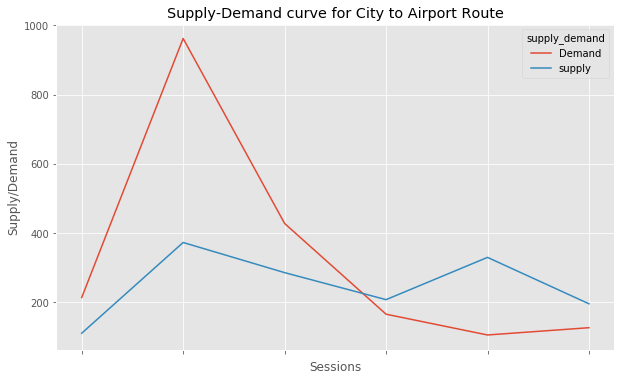

In [37]:
#Plotting Supply and Demand on the City to Airport Route

df3=df[df["pickup_point"].str.contains('City')==True]
df3.groupby(['session','supply_demand']).supply_demand.count().unstack().plot.line(legend=True, figsize=(10,6))
plt.title('Supply-Demand curve for City to Airport Route')
plt.xlabel('Sessions')
plt.ylabel('Supply/Demand')
plt.show()

Observation:

    We observe that the Demand is very high in the morning from City to Airport route but the supply is very low

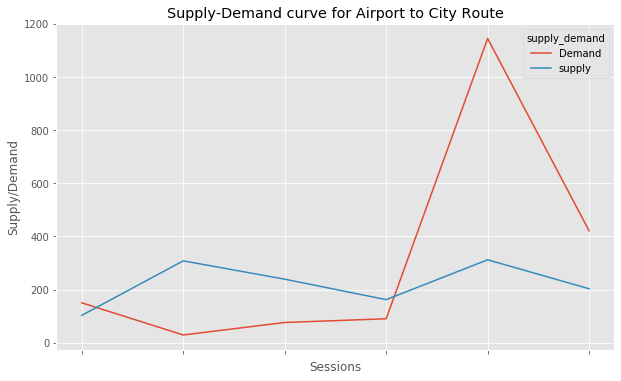

In [38]:
#Plotting Supply and Demand on the Airport to City route

df3=df[df["pickup_point"].str.contains('Airport')==True]
df3.groupby(['session','supply_demand']).supply_demand.count().unstack().plot.line(legend=True, figsize=(10,6))
plt.title('Supply-Demand curve for Airport to City Route')
plt.xlabel('Sessions')
plt.ylabel('Supply/Demand')
plt.show()

Observation:
    
    We observe that the Demand is very high in the evening in the Airport to City route but the supply is very low

Correlating these two plots, a possible hypothesis could be:

The demand during morning and afternoon hours from the Airport to City is quite low, which means that a driver who completed a City to Airport route in the morning hours may have to wait a really long time to get a ride back to the City, or he may have to come back without a passenger. Both situations are not idle for drivers, which might be the reason for highest number of "Cancelled" trips in the City to Airport trip in the morning hours



The vice versa happens in evening when there are too many flight coming in to the airport and hence there is a high demand for cabs and not enough supply. which is why most number of "No Cars Available" were observed in Evening in the Airport to City route.







Possible Solution:

Give incentives/surge pricing/bonus for trips from City to Airport during Morning hours.
Give incentives/surge pricing/bonus for trips from Airport to City during Evening hours.
Uber can give Gas expense to drivers qwhen they return from Airport without a ride or go to airpot for pick up without a ride.
Uber can increase market share by marketing campaigns and offers to customers when demand is low.